In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("train.csv")

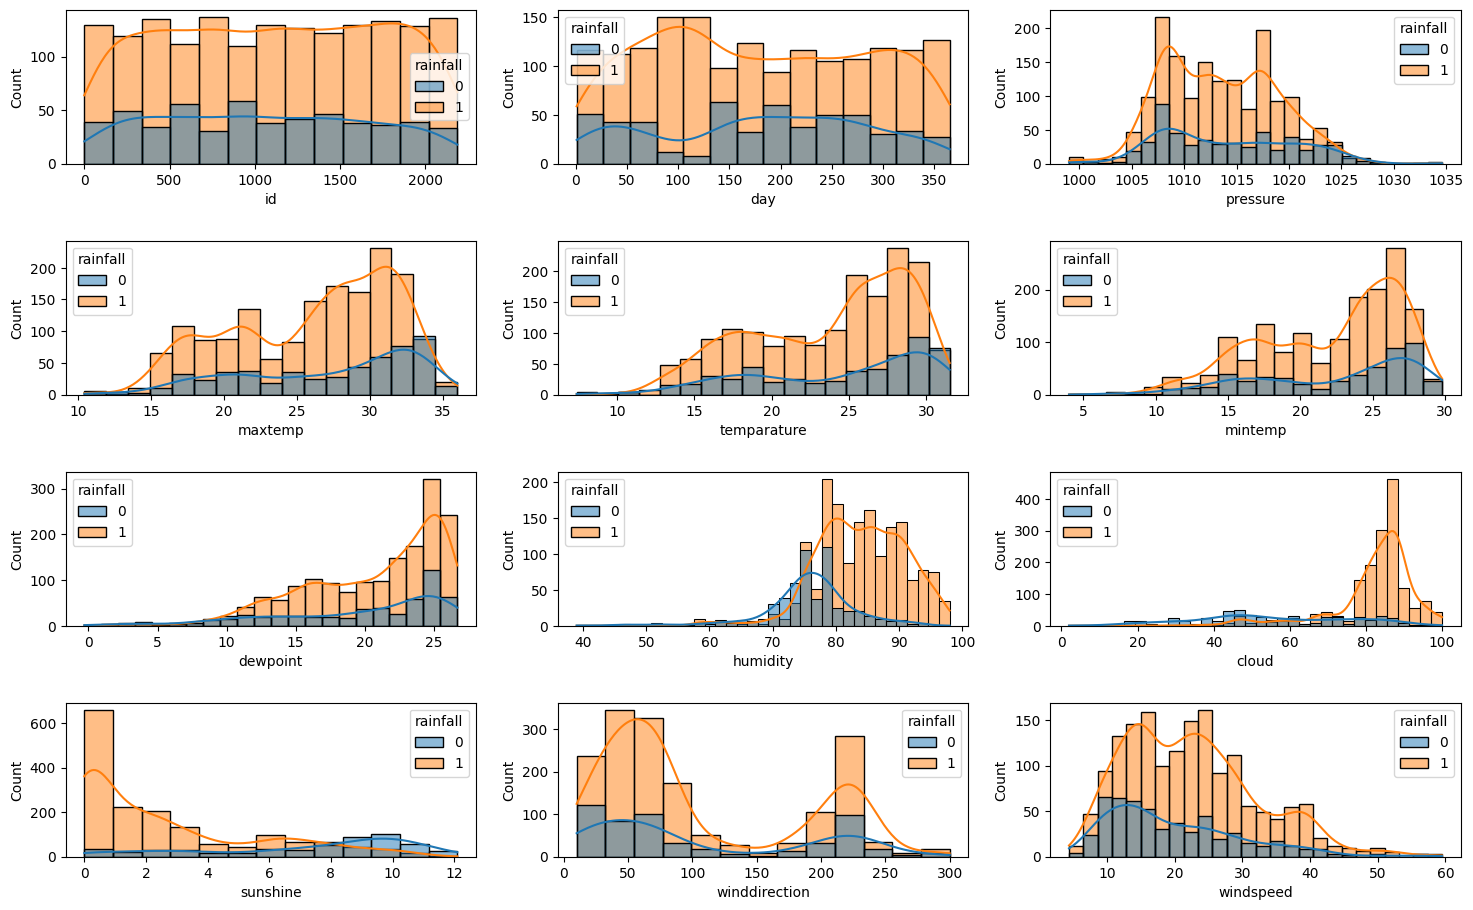

In [ ]:
i,j = 0, 0
fig, ax = plt.subplots(4, 3, figsize=(18 , 11))
for colum in data.columns[:-1]:
    sns.histplot(data=data, x=colum, hue="rainfall", kde=True, ax=ax[j, i])
    if i < 2:
        i += 1
    else:
        i = 0
        j += 1
    plt.subplots_adjust(hspace = 0.5)

In [ ]:
data.shape

(2190, 13)

<Axes: >

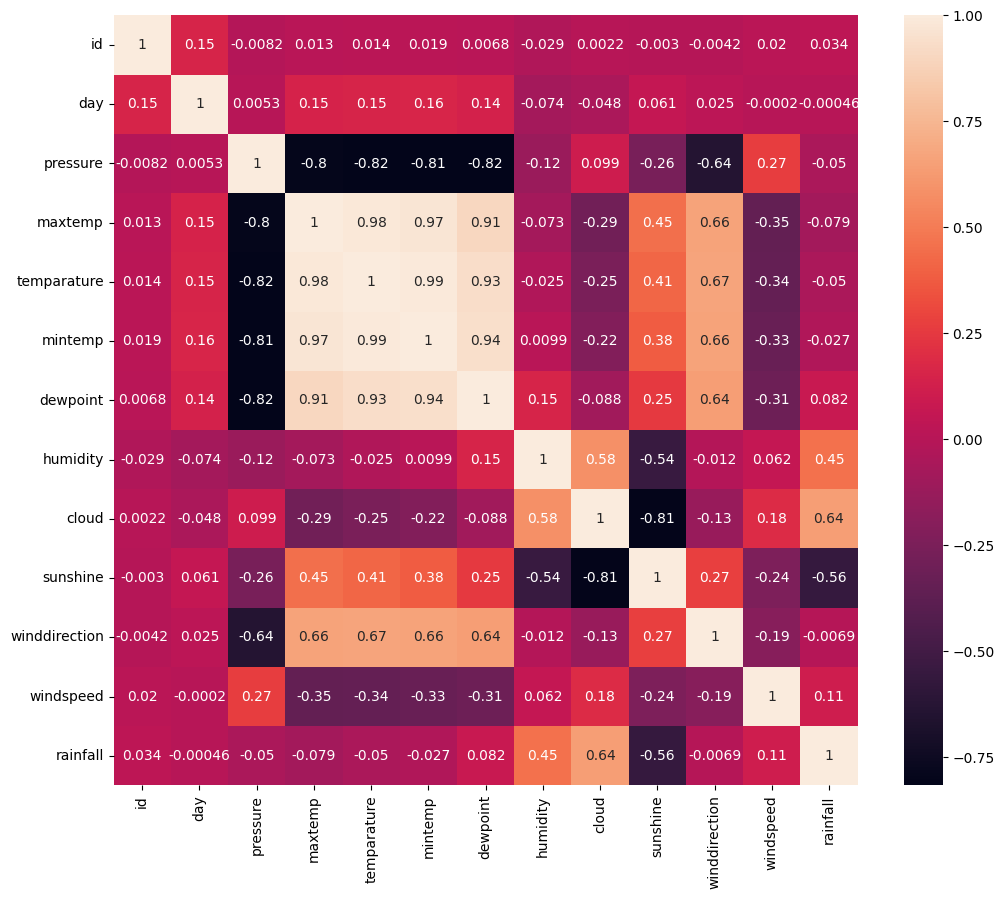

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=data.corr(), annot=True)

In [ ]:
data.head(8)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1


In [ ]:
data.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [ ]:
data.shape

(2190, 13)

In [ ]:
data['season'] = data['day'] % 365

def get_season(day):
    month = (day % 365) // 30 + 1
    if month in [12, 1, 2]:
        return 0 #'Winter'
    elif month in [3, 4, 5]:
        return 1 #'Spring'
    elif month in [6, 7, 8]:
        return 2 #'Summer'
    else:
        return 3 #'Autumn'

data['season'] = data['day'].apply(get_season)
data = pd.get_dummies(data, columns=['season'], dtype=int)
data['temp_range'] = data['maxtemp'] - data['mintemp']
data['temp_dew_diff'] = data['temparature'] - data['dewpoint']

In [ ]:
data, y = data.drop(["rainfall", "day", "id", "mintemp", "maxtemp"], axis=1), data["rainfall"]

In [ ]:
norm = StandardScaler()
data2 = norm.fit_transform(data)
data = pd.DataFrame(data=data2, columns=data.columns)
svc = SVC(probability=True)
svc.fit(data, y)

SVC(probability=True)

In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(data, y, test_size = 0.2, shuffle=True)

In [ ]:
#pipe = Pipeline(steps=[
#("scaler", StandardScaler()),
#("svc", SVC())
#])
#pipe.fit(xtrain, ytrain)
#print(roc_auc_score(ytest, pipe.predict(xtest)))

In [ ]:
#pipe2 = Pipeline(steps=[
#"scaler", StandardScaler()),
#("variance", VarianceThreshold(0.01)),
#("LogisicRegression", LogisticRegression(penalty="l2"))
#])
#pipe2.fit(xtrain, ytrain)
#print(roc_auc_score(ytest, pipe2.predict(xtest)))

In [ ]:
#for i in range(1, 20):
#    rfc = RandomForestClassifier(n_estimators=i)
#    rfc.fit(xtrain, ytrain)
#    print(f"trees={i}, roc = {roc_auc_score(ytest, rfc.predict(xtest))}")

In [ ]:
test_data = pd.read_csv("test.csv")
test_data['season'] = test_data['day'] % 365

def get_season(day):
    month = (day % 365) // 30 + 1
    if month in [12, 1, 2]:
        return 0 #'Winter'
    elif month in [3, 4, 5]:
        return 1 #'Spring'
    elif month in [6, 7, 8]:
        return 2 #'Summer'
    else:
        return 3 #'Autumn'

test_data['season'] = test_data['day'].apply(get_season)
test_data = pd.get_dummies(test_data, columns=['season'], dtype=int)
test_data['temp_range'] = test_data['maxtemp'] - test_data['mintemp']
test_data['temp_dew_diff'] = test_data['temparature'] - test_data['dewpoint']
test_data = test_data.drop(["id", "day", "mintemp", "maxtemp"], axis=1)
test_data = pd.DataFrame(data=norm.transform(test_data), columns=test_data.columns)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       730 non-null    float64
 1   temparature    730 non-null    float64
 2   dewpoint       730 non-null    float64
 3   humidity       730 non-null    float64
 4   cloud          730 non-null    float64
 5   sunshine       730 non-null    float64
 6   winddirection  729 non-null    float64
 7   windspeed      730 non-null    float64
 8   season_0       730 non-null    float64
 9   season_1       730 non-null    float64
 10  season_2       730 non-null    float64
 11  season_3       730 non-null    float64
 12  temp_range     730 non-null    float64
 13  temp_dew_diff  730 non-null    float64
dtypes: float64(14)
memory usage: 80.0 KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       2190 non-null   float64
 1   temparature    2190 non-null   float64
 2   dewpoint       2190 non-null   float64
 3   humidity       2190 non-null   float64
 4   cloud          2190 non-null   float64
 5   sunshine       2190 non-null   float64
 6   winddirection  2190 non-null   float64
 7   windspeed      2190 non-null   float64
 8   season_0       2190 non-null   float64
 9   season_1       2190 non-null   float64
 10  season_2       2190 non-null   float64
 11  season_3       2190 non-null   float64
 12  temp_range     2190 non-null   float64
 13  temp_dew_diff  2190 non-null   float64
dtypes: float64(14)
memory usage: 239.7 KB


In [ ]:
test_data.head(5)

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,season_0,season_1,season_2,season_3,temp_range,temp_dew_diff
0,1.043116,-1.561525,-1.050569,1.790447,1.291621,-1.032804,-0.685925,0.252142,1.741594,-0.583326,-0.569968,-0.58192,0.396278,-1.356510
1,0.512525,-1.427456,-1.012742,1.918671,1.291621,-1.032804,-0.685925,1.363657,1.741594,-0.583326,-0.569968,-0.58192,-1.636616,-1.095491
2,1.821316,-2.595766,-2.185385,0.508211,1.125161,-1.032804,-0.810950,-0.495605,1.741594,-0.583326,-0.569968,-0.58192,-1.571039,-1.043288
3,1.644452,-1.274235,-2.071904,-0.902250,-1.704654,0.925547,-1.061000,2.909674,1.741594,-0.583326,-0.569968,-0.58192,0.789742,2.245546
4,1.520647,-1.944577,-3.055411,-1.799815,-1.482707,1.504778,-1.061000,-0.242988,1.741594,-0.583326,-0.569968,-0.58192,3.609563,3.133010


In [ ]:
test_data.fillna(0, inplace=True)

In [ ]:
sub = pd.read_csv("sample_submission.csv")
sub["rainfall"] = 1 - svc.predict_proba(test_data)
sub.to_csv("answer.csv", index=False)